In [1]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from keras.layers.core import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

import matplotlib as plt

import keras

import pickle

img_height,img_width=180,180

batch_size=32

2023-06-20 11:56:52.419031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 11:56:53.243403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
model=keras.models.load_model("resnet50")

2023-06-18 17:46:53.864864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-18 17:46:53.944549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-18 17:46:53.944715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
epochs=200 #tem que bater certo

In [4]:
with open('/home/madalena/Downloads/projeto_final/train_models/r50n', "rb") as file_pi:
    history = pickle.load(file_pi)

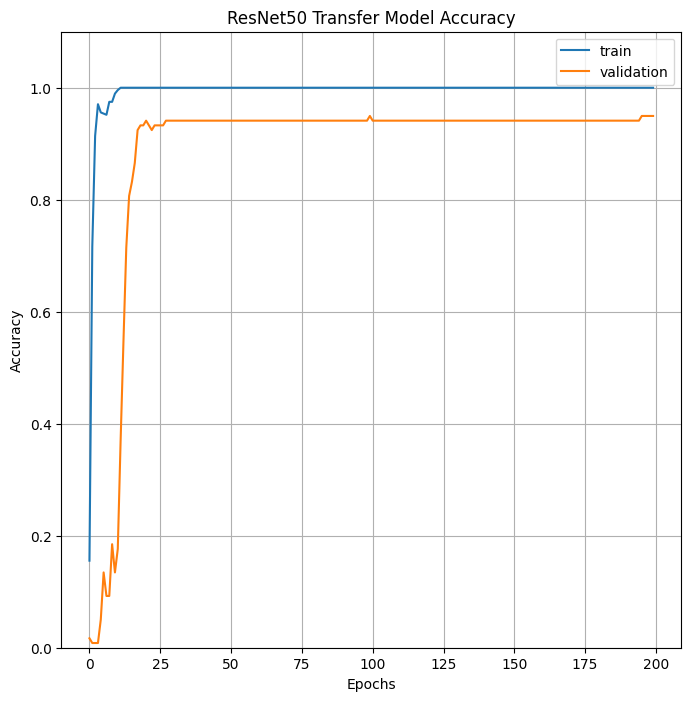

In [5]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range,history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range,history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0,ymax=1.1)

plotter_lib.grid()

plotter_lib.title('ResNet50 Transfer Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

#plotter_lib.show()

plotter_lib.savefig('resnet50transfer.png')

In [76]:
model=keras.models.load_model("vgg16transfer")

In [77]:
test_path="/home/madalena/Downloads/projeto_final/test"

In [78]:
import os

labels=[]
for i in os.listdir(test_path):
    labels.append(i)

test_set=tflow.keras.utils.image_dataset_from_directory(
    test_path,
    labels=labels,
    #label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=False
)

Found 85 files belonging to 85 classes.


In [79]:
pred=model.predict(test_set)

1/3 [=========>....................] - ETA: 0s

2023-06-18 18:19:16.127805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [85]
	 [[{{node Placeholder/_4}}]]
2023-06-18 18:19:16.128028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [85]
	 [[{{node Placeholder/_4}}]]


3/3 [==============================] - 0s 125ms/step


In [80]:
pred_labels=[]
for i in range(85):
    image_output_class=labels[np.argmax(pred[i])]
    pred_labels.append(image_output_class)
    #print("class is", labels[i])
    label=labels[i]
    #if image_output_class == label:
     #   print("Match")
    #print("The predicted class is", image_output_class)

In [81]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, pred_labels)
print(accuracy)
r = sklearn.metrics.confusion_matrix(labels, pred_labels,labels=labels)
#print(r)

precision = sklearn.metrics.precision_score(labels, pred_labels,average='weighted')
print(precision)

recall = sklearn.metrics.recall_score(labels, pred_labels,average='weighted')
print(recall)

f1_score = sklearn.metrics.f1_score(labels, pred_labels,average='weighted')
print(f1_score)

0.9411764705882353
0.9117647058823529
0.9411764705882353
0.9215686274509803


/home/madalena/anaconda3/envs/hii/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


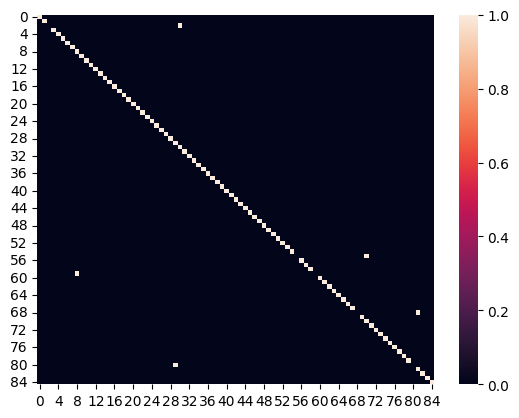

In [82]:
import seaborn as sns
h=sns.heatmap(r)
fig=h.get_figure()
fig.savefig('vgg16theatmap.png')

# bar plot

In [3]:
models=["r50", "r50t", "iv3", "iv3t", "irn", "irnt", "vgg16", "vgg16t"]
accs=[1.0,0.976,0.964,0.906,1.0,0.188,0.00118,0.941]

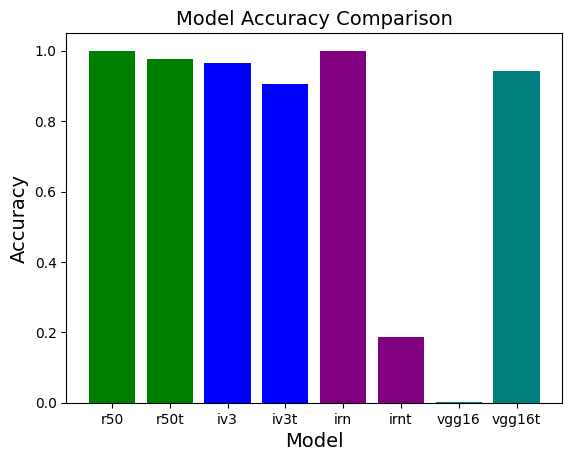

In [9]:
import matplotlib.pyplot as plt
colors = ['green', 'green', 'blue', 'blue', 'purple','purple','teal', 'teal']
plt.bar(models,accs, color=colors)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(False)
#plt.show()
plt.savefig('barplot.png')